# statsmodel

- 다양한 통계를 할 수 있는 라이브러리

## Hodrick Prescott filter(HP)
- 2가지로 구분: trend, cycle

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

import statsmodels.api as sm
df = sm.datasets.macrodata.load_pandas().data
df.index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))
# print(sm.datasets.macrodata.NOTE)

In [3]:
df

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-09-30,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008-12-31,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009-03-31,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009-06-30,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


<AxesSubplot: >

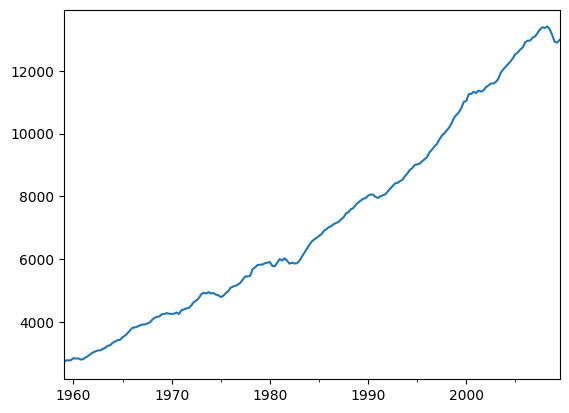

In [2]:
df['realgdp'].plot()

In [10]:
from statsmodels.tsa.filters.hp_filter import hpfilter

cycle, trend = hpfilter(df['realgdp'], lamb = 1600) # 시계열에서 trend, cycle로 분리시켜 줌 > trend, cycle 더해주면 원본 데이터가 나옴

In [11]:
gdp = pd.concat([df['realgdp'], trend], axis = 1)
gdp.head()

,realgdp,realgdp_trend
1959-03-31,2710.349,2670.837085
1959-06-30,2778.801,2698.712468
1959-09-30,2775.488,2726.612545
1959-12-31,2785.204,2754.612067
1960-03-31,2847.699,2782.816333


<AxesSubplot: >

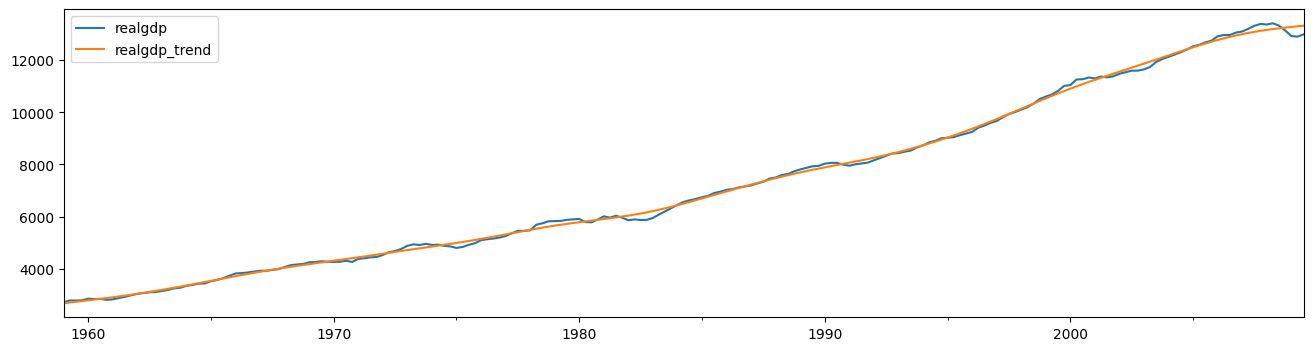

In [13]:
gdp.plot(figsize=(16,4))

<AxesSubplot: >

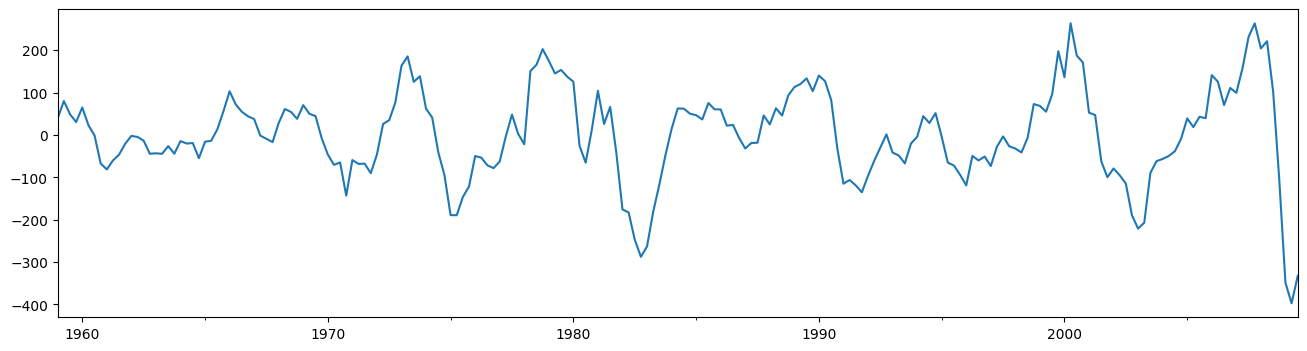

In [14]:
cycle.plot(figsize=(16,4))

## ETS Models
- 3가지로 구분: error, trend, seasonality
- 에러만 보고 싶거나, 트렌드만, 계절성만 보고 싶을 때 활용하면 좋음. > ets 말고도 이런 각각의 특성들 보고 싶을 때 사용하면 좋음
- trend랑 seasonal noise 구분 해줌!?!
- error는 어디서 봄?!

In [15]:
import pandas as pd
import numpy as np

In [19]:
airline = pd.read_csv('airline_passengers.csv')
airline.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [22]:
airline = pd.read_csv('airline_passengers.csv', index_col = 'Month', parse_dates = True) # index를 Month컬럼으로!(set index를 따로 안해도됨) / parse_dates하면 날짜를 인식해줌(to_datetime 안해도됨!) 
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [23]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [24]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

<AxesSubplot: xlabel='Month'>

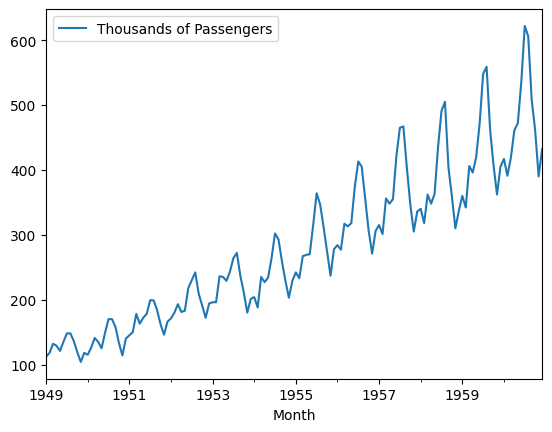

In [25]:
airline.plot()

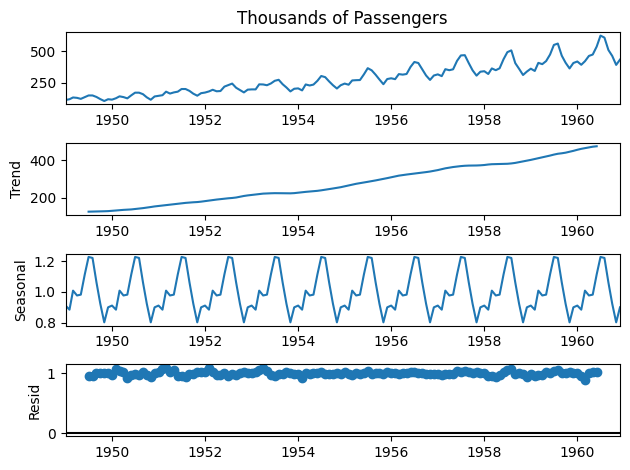

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

# 트렌드+계절성인 데이터는 이렇게 분해할 수 있음
result = seasonal_decompose(airline['Thousands of Passengers'], model = 'multiplcative') # 그래프 보면 직선으로 증가 보다는 배수로 증가.. 이럴때 쓰는 모델!
result.plot(); # ; 이거 없으면 2개 나옴

<AxesSubplot: xlabel='Month'>

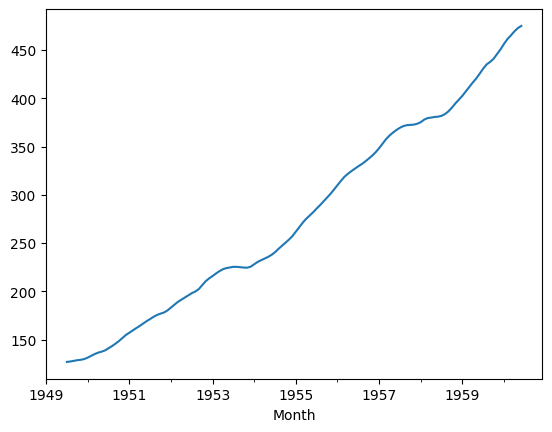

In [32]:
result.trend.plot()

<AxesSubplot: xlabel='Month'>

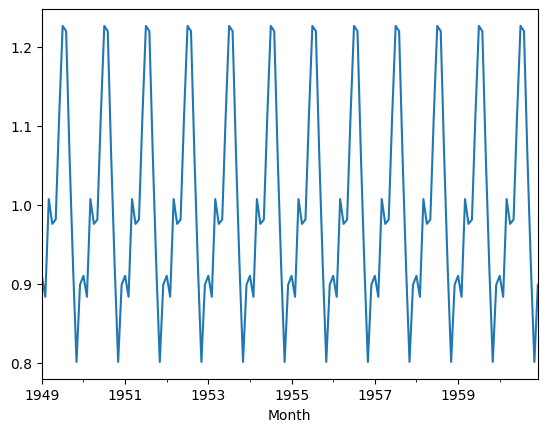

In [33]:
result.seasonal.plot()

SMA
- 단순이동평균(이동평균): 전체적인 추세를 보는데 용이
- noise가 심하다 > 하루는 많이 떨어졌다, 올랐다.. 이럴때..... window size 크게 할 수롣 그래프 밑으로 그려짐

## EWMA

EWMA
- 지수이동평균: `최근 데이터에 더 가중치를 줄 수 있다!` (sma랑 ema랑 추세(아래에서 위로)변한 시기가 다름!)
- adjust가 False 일때는 이런 가중치를 쓰는데.. 3가지.. 그중 span(window와 비슷한 개념)을 제일 많이 씀

In [ ]:
# 실제주가데이터로 해보자

In [37]:
!pip install -U finance-datareader

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import FinanceDataReader as fdr

In [40]:
vivo = fdr.DataReader('082800', '2018')[['Close']] # 종가 컬럼만 필요해서!
vivo.head()

,Close
Date,
2018-01-02,1035
2018-01-03,1045
2018-01-04,1040
2018-01-05,1060
2018-01-08,1065


In [41]:
vivo['MA6'] = vivo['Close'].rolling(window = 6).mean()
vivo['MA12'] = vivo['Close'].rolling(window = 12).mean()

<AxesSubplot: xlabel='Date'>

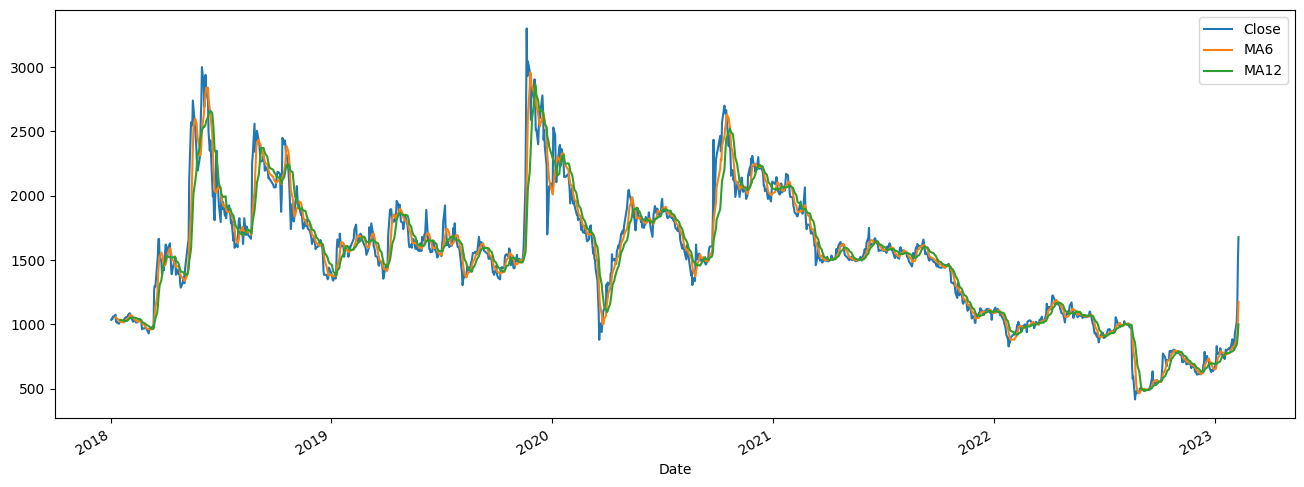

In [43]:
vivo.plot(figsize=(16,6))

<AxesSubplot: xlabel='Date'>

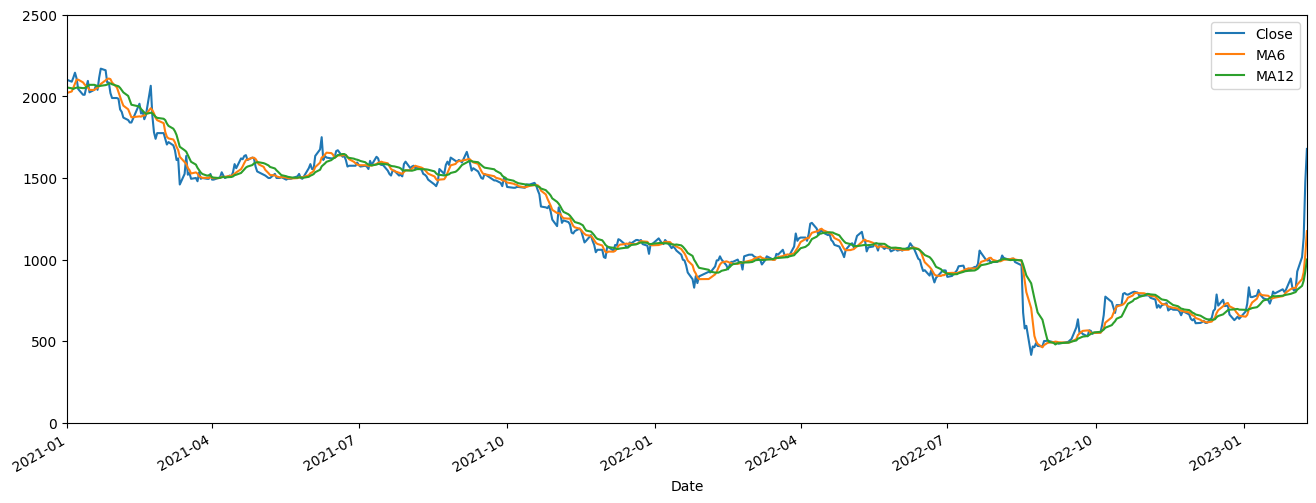

In [47]:
vivo.plot(figsize=(16,6), xlim=['2021-01-01', '2023-02-09'], ylim = [0,2500]) # 추려보기 > 보고 싶은 부분 좀 더 자세히, 잘 볼 수 있음 /// # noise에 빠르게 반응함..?

In [48]:
vivo['EWMA12'] = vivo['Close'].ewm(span=12, adjust=False).mean()

<AxesSubplot: xlabel='Date'>

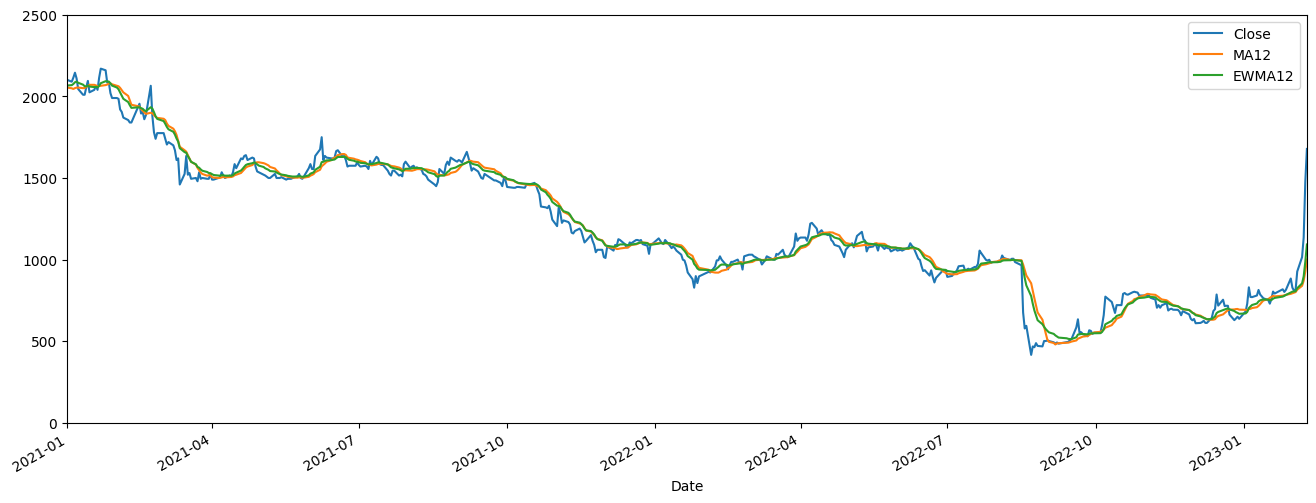

In [49]:
vivo[['Close', 'MA12', 'EWMA12']].plot(figsize=(16,6), xlim=['2021-01-01', '2023-02-09'], ylim = [0,2500]) # 초록색 선이 올라갈때도 먼저 올라가고, 떨어질때도 먼저 떨어짐 > ewma가 좀 더 그냥 이동평균보다 빠르게 반응함!

## Holt Winters Method
- Holt-Winters
- 3개의 식으로 구성됨 > level, trend, seasonal
- 1차 2차 3차.. (2차까지 다루면 추세, 트렌드까지 다루는거고.. 3차까지 다루면 계절성까지 다루는거임)
- Holt-Winters는 frequency가 필요하다!

In [52]:
airline.index # index에 대한 frequency필요!! > 여긴 아직 지정x.(freq=None) frequency 추가해주기!

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [53]:
airline.index.freq = 'MS'
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [54]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [61]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
span = 12
alpha = 2/(span+1)

model = SimpleExpSmoothing(airline['Thousands of Passengers']).fit(smoothing_level = alpha, optimized=False) # 데이터를 활용할 모델에 데이터를 넣어줌!
airline['SES12'] = model.fittedvalues.shift(-1) # Simple Exponaatial Smoothing.. / 하나 땡겨줘야 우리가 원하는 값이 원하는 자리에 들어간다고 함!
airline['EWMA12'] = airline['Thousands of Passengers'].ewm(alpha = alpha, adjust = False).mean() # 결과가 같음! ses에서 알파까지 쓴거랑, 지수평활(ewma)랑 값이 같음!
airline.head()

,Thousands of Passengers,SES12,EWMA12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


<AxesSubplot: xlabel='Month'>

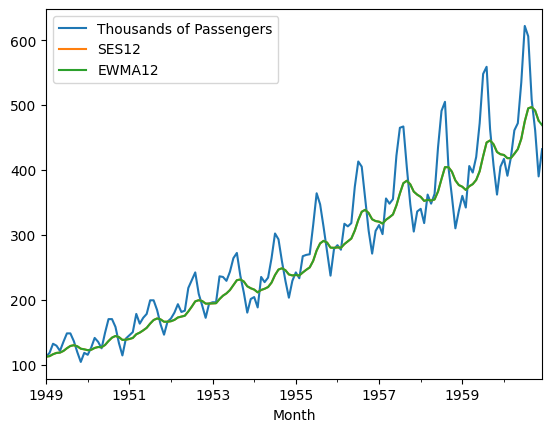

In [62]:
airline.plot() # ses12랑 ewma12 같이 같아서 주황색 선이 안보이는거임

In [63]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

airline['EXPadd'] = model = ExponentialSmoothing(airline['Thousands of Passengers'], trend = 'add').fit().fittedvalues # 모델에 대한 결과를 바로 내뱉겠다 / 얘는 배수로 늘어난다 가정x, add로 해보자!
airline

,Thousands of Passengers,SES12,EWMA12,EXPadd
Month,,,,
1949-01-01,112,112.000000,112.000000,120.527273
1949-02-01,118,112.923077,112.923077,114.102394
1949-03-01,132,115.857988,115.857988,120.040657
1949-04-01,129,117.879836,117.879836,134.001539
1949-05-01,121,118.359861,118.359861,131.085845
...,...,...,...,...
1960-08-01,606,494.898619,494.898619,623.656106
1960-09-01,508,496.914216,496.914216,608.168786
1960-10-01,461,491.388952,491.388952,510.571382


<AxesSubplot: xlabel='Month'>

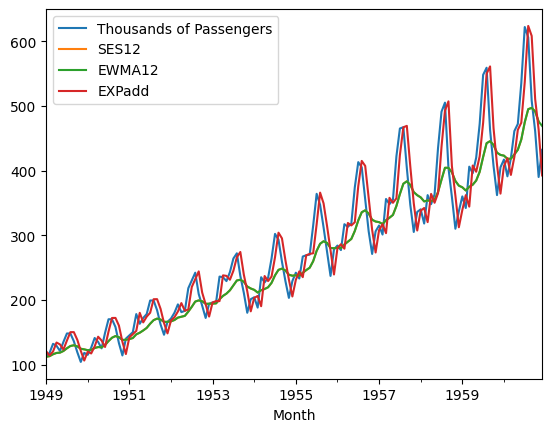

In [64]:
airline.plot() # 예측모델이 이렇게 됨 > 트렌드까지 학습해서 유추해서 결과를 낸거임! 모델이! 하나의 계수인 알파를 한것보다 트렌드까지 할 수 있는 베타 계수를 활용해서 더 정확해짐! 원본데이터랑.. 예측 굿...

In [66]:
airline['EXPmul'] = model = ExponentialSmoothing(airline['Thousands of Passengers'], trend = 'mul').fit().fittedvalues
airline

,Thousands of Passengers,SES12,EWMA12,EXPadd,EXPmul
Month,,,,,
1949-01-01,112,112.000000,112.000000,120.527273,120.527273
1949-02-01,118,112.923077,112.923077,114.102394,113.990701
1949-03-01,132,115.857988,115.857988,120.040657,120.031669
1949-04-01,129,117.879836,117.879836,134.001539,134.235979
1949-05-01,121,118.359861,118.359861,131.085845,131.270786
...,...,...,...,...,...
1960-08-01,606,494.898619,494.898619,623.656106,632.423449
1960-09-01,508,496.914216,496.914216,608.168786,616.673652
1960-10-01,461,491.388952,491.388952,510.571382,517.378618


<AxesSubplot: xlabel='Month'>

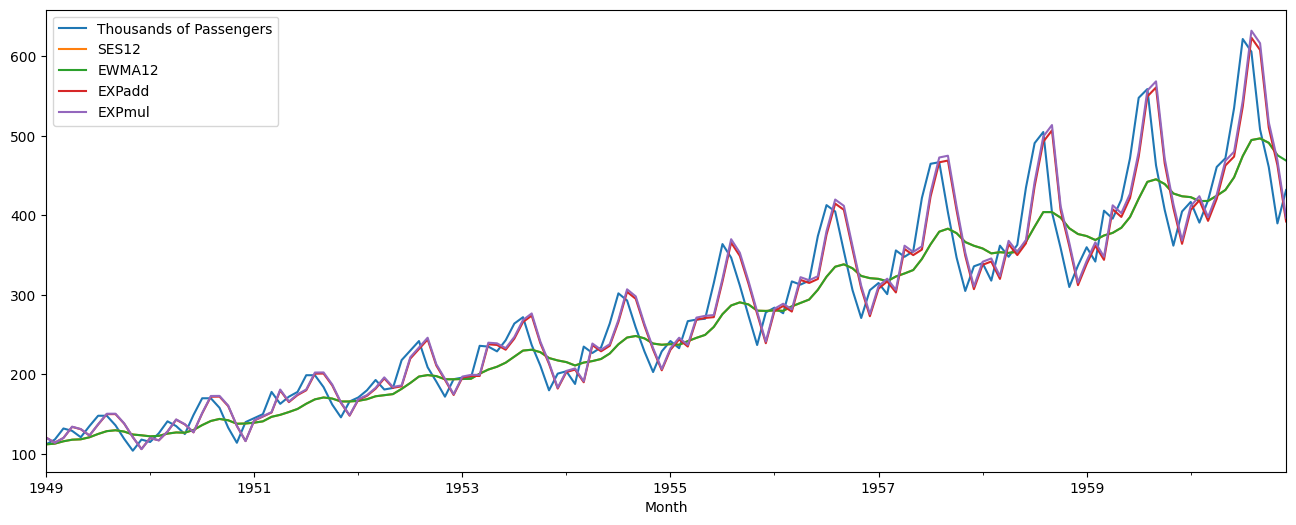

In [70]:
airline.plot(figsize=(16,6))

<AxesSubplot: xlabel='Month'>

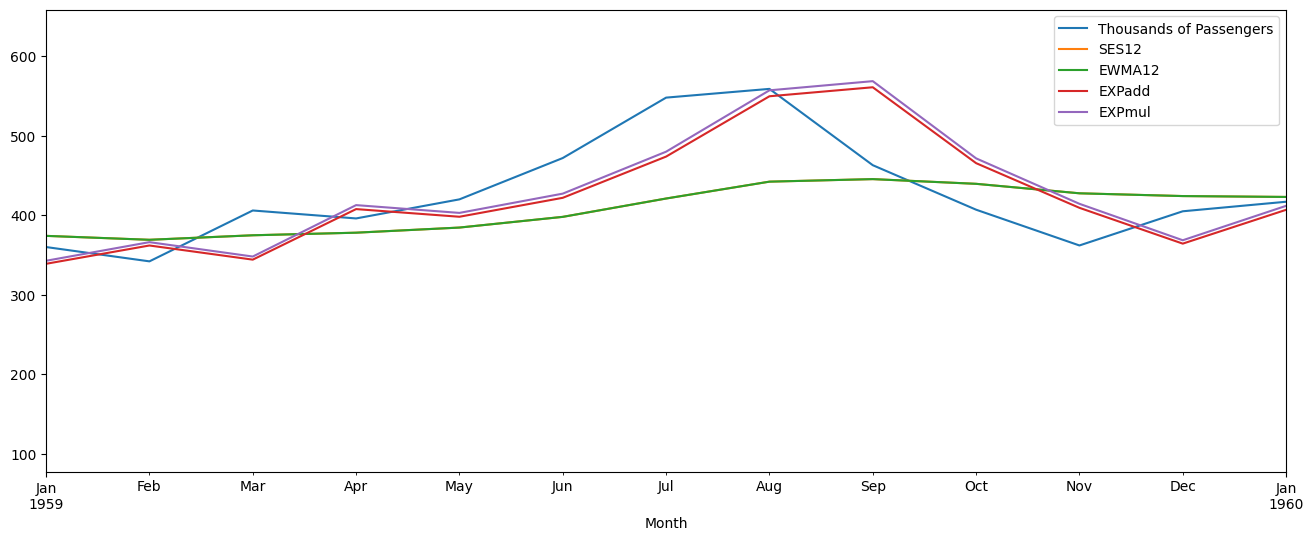

In [71]:
airline.plot(figsize=(16,6), xlim=['1959-01-01', '1960-01-01'])

<AxesSubplot: xlabel='Month'>

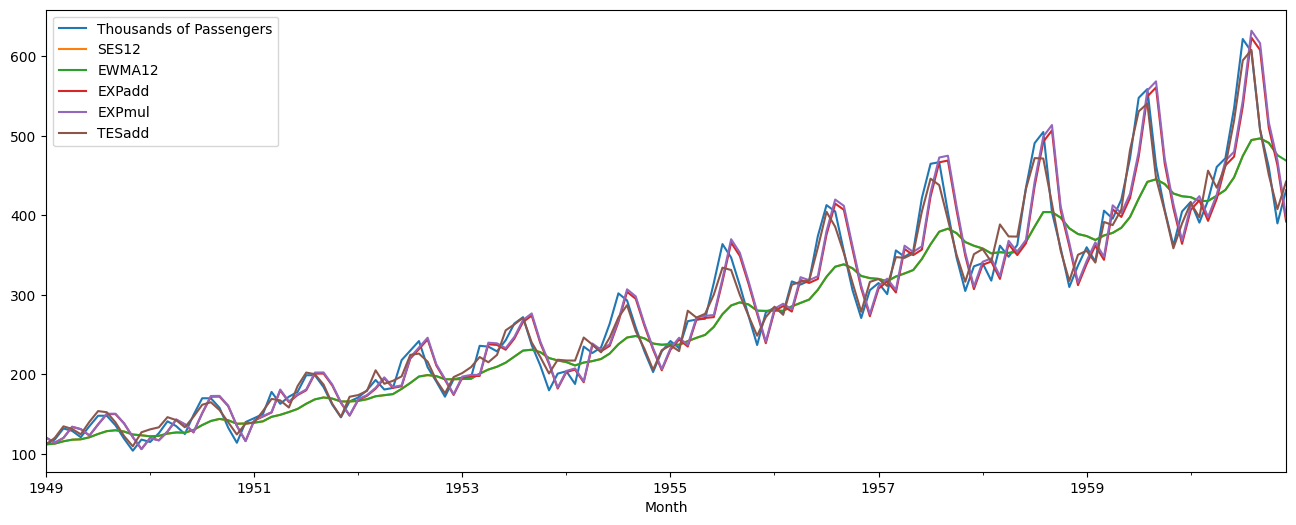

In [73]:
# 삼중지수평활
airline['TESadd'] = model = ExponentialSmoothing(airline['Thousands of Passengers'], trend = 'add', seasonal = 'add').fit().fittedvalues # seasonal 추가해주니까 그런 주기성은 학습을 잘함! 위에 2개에 비해서!
airline.plot(figsize=(16,6))

C:\Users\SBAUser\.venv\Second_Day\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<AxesSubplot: xlabel='Month'>

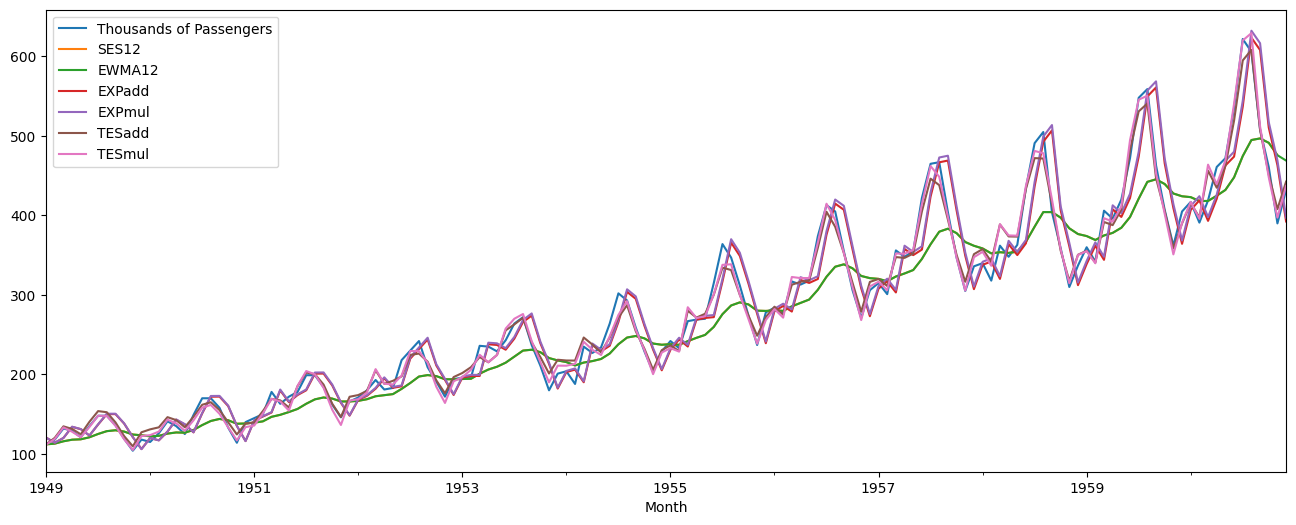

In [74]:
# 삼중지수평활
airline['TESmul'] = model = ExponentialSmoothing(airline['Thousands of Passengers'], trend = 'mul', seasonal = 'mul').fit().fittedvalues # 배수형식(mul)으로 trend랑 seasonal 넣어줬더니.. 시기나 높이나.. 다른 모델에 비해서 정확성이 가장 높아짐!!!
airline.plot(figsize=(16,6))

<AxesSubplot: xlabel='Month'>

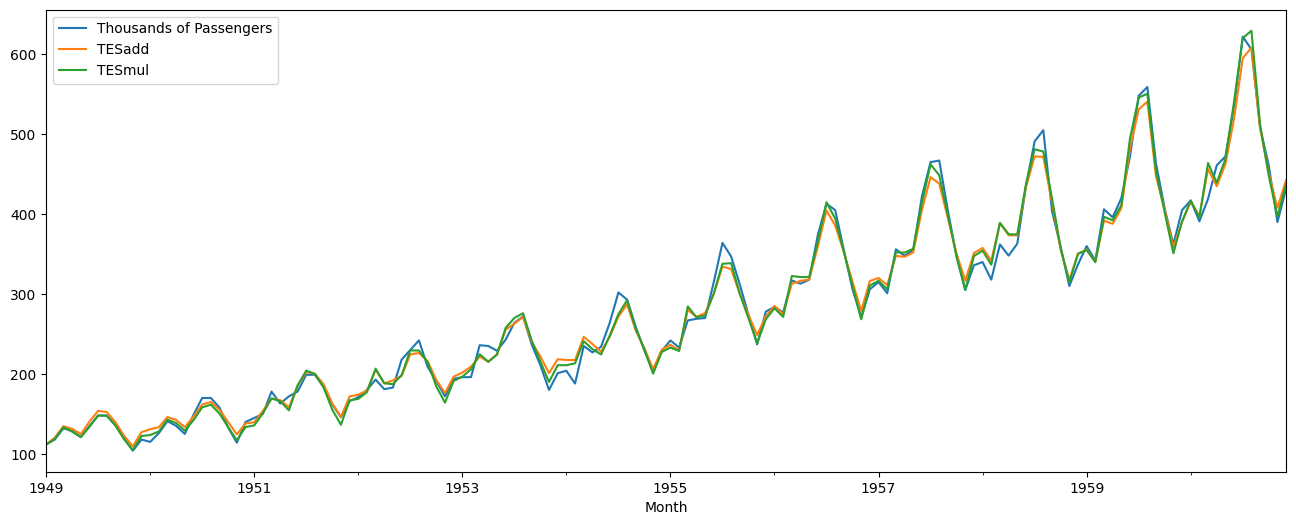

In [75]:
airline[['Thousands of Passengers', 'TESadd', 'TESmul']].plot(figsize=(16,6)) # 초록색이 굉장히 파란색(원본데이터)과 비슷! >>> 이렇게 모델을 만든 다음에.. 다음을 예측할 수 있는거임!!!

- Prophet: 이제 좀 모델같은 모델!! AI...우리가 아는 인공지능.과 비슷......